In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = "../data/"
TRAIN_PATH = os.path.join(DATA_PATH, "Train.csv")

In [3]:
## reading data
df_train = pd.read_csv(TRAIN_PATH)
df_train.head()

,Image_ID,confidence,class,ymin,xmin,ymax,xmax
0,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,194.649671,328.803454,208.107730,341.967928
1,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,149.632401,256.768914,162.910362,266.195724
2,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,234.046875,327.138158,252.712993,338.876645
3,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,221.277138,340.411184,238.593750,354.651316
4,id_11ee1c.jpg,1.0,Pepper_Fusarium,2000.563598,989.588908,2184.252196,1401.748952


#### Goals
- Find most representative bounding boxes

In [4]:
df_train["width"] = df_train["xmax"] - df_train["xmin"]
df_train["height"] = df_train["ymax"] - df_train["ymin"]
df_train["size"] = df_train["width"]*df_train["height"]
df_train["aspect"] = df_train["width"]/df_train["height"]

In [5]:
df_train.head()

,Image_ID,confidence,class,ymin,xmin,ymax,xmax,width,height,size,aspect
0,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,194.649671,328.803454,208.107730,341.967928,13.164474,13.458059,177.168266,0.978185
1,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,149.632401,256.768914,162.910362,266.195724,9.426809,13.277961,125.168801,0.709959
2,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,234.046875,327.138158,252.712993,338.876645,11.738487,18.666118,219.111985,0.628866
3,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,221.277138,340.411184,238.593750,354.651316,14.240132,17.316612,246.590831,0.822339
4,id_11ee1c.jpg,1.0,Pepper_Fusarium,2000.563598,989.588908,2184.252196,1401.748952,412.160044,183.688598,75709.100730,2.243798


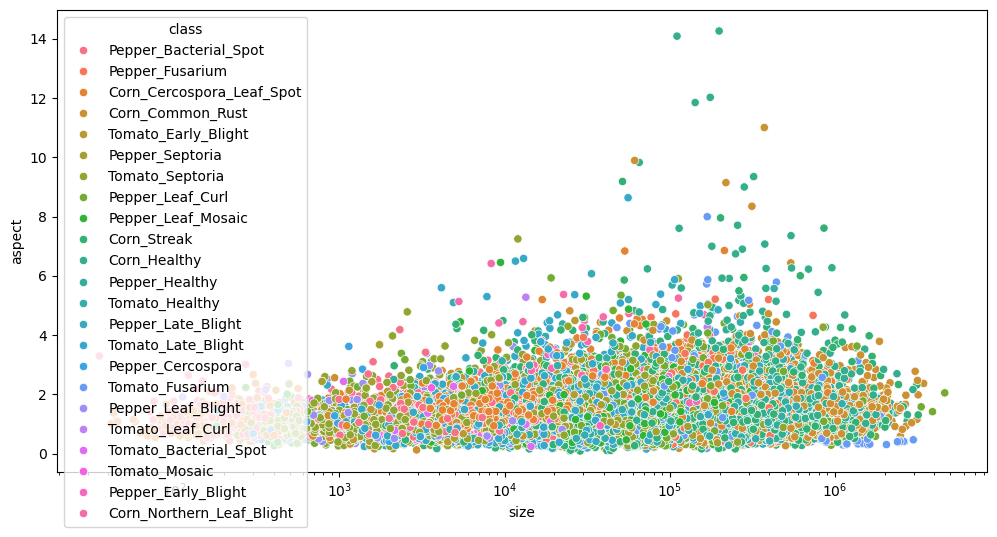

In [6]:
figure = plt.figure(figsize=(12,6))
sns.scatterplot(df_train, x="size", y="aspect", hue="class")
plt.xscale("log")
# plt.axhline(1)
# plt.xlim((10000,100000))
plt.show()

### Testing Hypotheses

In [7]:
def sampling_dist(data, sample_size=1000, num_samples=100):
    np.random.seed(42)
    means = []
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        means.append(np.mean(sample))

    std = np.std(data)/np.sqrt(sample_size)
    return means, std

def get_z(data, means, sampling_std):
    data_mean = np.mean(data)
    sampling_mean = np.mean(means)
    return  (data_mean - sampling_mean)/sampling_std

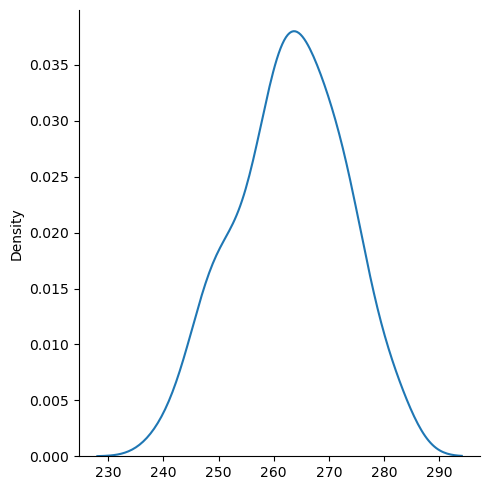

In [8]:
feature = "width"
means,sampling_dist_std = sampling_dist(df_train[feature])
sns.displot(means, kind="kde")

In [9]:
# get_z(df_train[df_train["class"]=="Corn_Common_Rust"]["size"], means, sampling_dist_std)
for cat in df_train["class"].unique():
    z = get_z(df_train[df_train["class"]==cat][feature], means, sampling_dist_std)
    print(cat,z)

Pepper_Bacterial_Spot -21.73228648539697
Pepper_Fusarium 25.74594385079674
Corn_Cercospora_Leaf_Spot -13.414282388635932
Corn_Common_Rust 62.33579950305617
Tomato_Early_Blight -13.680373762852517
Pepper_Septoria -6.405864194093942
Tomato_Septoria -14.27170646079667
Pepper_Leaf_Curl 5.794667685869957
Pepper_Leaf_Mosaic -1.6516070435226804
Corn_Streak 24.057559593589193
Corn_Healthy 52.07223901093033
Pepper_Healthy 33.811271321635004
Tomato_Healthy 7.7104569104534155
Pepper_Late_Blight -13.558772036796507
Tomato_Late_Blight -11.478290499816957
Pepper_Cercospora -21.650806848606702
Tomato_Fusarium 13.290595661442463
Pepper_Leaf_Blight -18.452723431176892
Tomato_Leaf_Curl 5.703010882699648
Tomato_Bacterial_Spot -18.996133975685314
Tomato_Mosaic -4.001953595254088
Pepper_Early_Blight -5.660234313658252
Corn_Northern_Leaf_Blight -0.47912419141050694


In [10]:
df_train["class"].value_counts()

class
Corn_Cercospora_Leaf_Spot    6538
Tomato_Septoria              6483
Tomato_Late_Blight           3918
Corn_Streak                  3180
Tomato_Healthy               2872
Pepper_Septoria              2295
Pepper_Leaf_Mosaic           2113
Tomato_Early_Blight          1946
Pepper_Bacterial_Spot        1943
Corn_Common_Rust             1682
Corn_Healthy                 1571
Pepper_Leaf_Curl             1530
Tomato_Fusarium               882
Pepper_Healthy                736
Pepper_Late_Blight            575
Pepper_Leaf_Blight            508
Tomato_Bacterial_Spot         484
Pepper_Fusarium               472
Pepper_Cercospora             472
Tomato_Leaf_Curl              437
Corn_Northern_Leaf_Blight     157
Tomato_Mosaic                 134
Pepper_Early_Blight           101
Name: count, dtype: int64

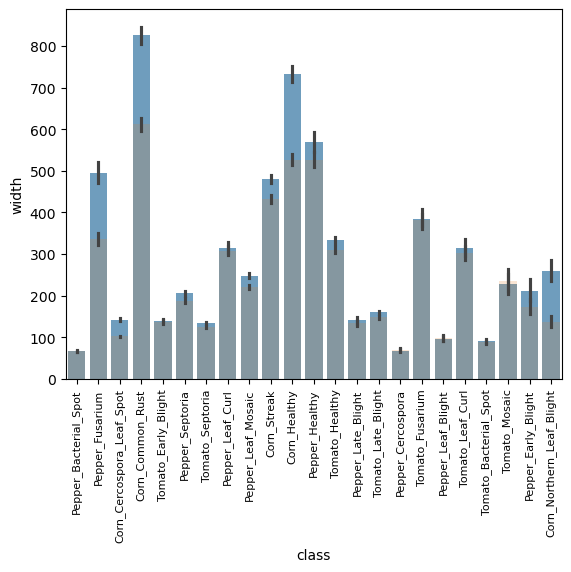

In [11]:
sns.barplot(df_train, x="class", y="width", alpha=0.7)
sns.barplot(df_train, x="class", y="height", alpha=0.2)
plt.xticks(rotation=90, size=8)
plt.show()

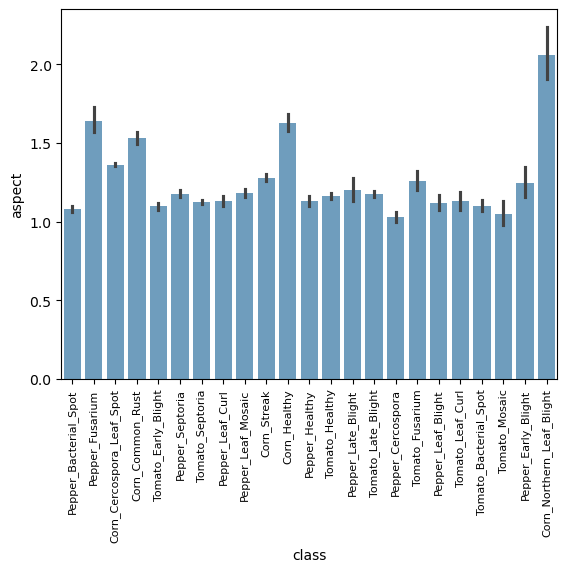

In [12]:
sns.barplot(df_train, x="class", y="aspect", alpha=0.7)
# sns.barplot(df_train, x="class", y="aspect", alpha=0.2)
plt.xticks(rotation=90, size=8)
plt.show()

In [13]:
df_train.groupby(["Image_ID", "class"]).count()["confidence"].max()

56

<Axes: >

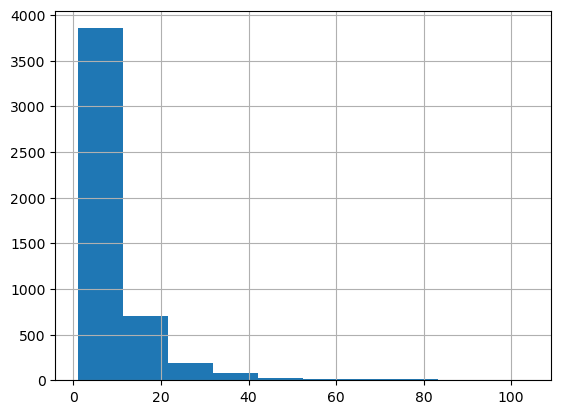

In [14]:
df_train.groupby("Image_ID").count()["confidence"].hist()

## Finding mean overlap of boxes

In [15]:
from torchvision.ops import box_iou
import torch

In [16]:
def find_mean_iou(df):
    img_ids = df["Image_ID"].unique()
    mean_ious_per_img = []
    for id in img_ids:
        boxes = df_train[df_train["Image_ID"] == id][["xmin", "ymin", "xmax", "ymax"]].values
        boxes = torch.from_numpy(boxes.astype(np.float32))

        if len(boxes) == 1:
            mean_ious_per_img.append(0)
            continue
            
        ious = box_iou(boxes, boxes)
        ious = np.triu(ious, 1)
        mean_iou = ious.sum()/sum(range(len(boxes)))
        mean_ious_per_img.append(mean_iou)

    return mean_ious_per_img

In [17]:
miou = find_mean_iou(df_train)

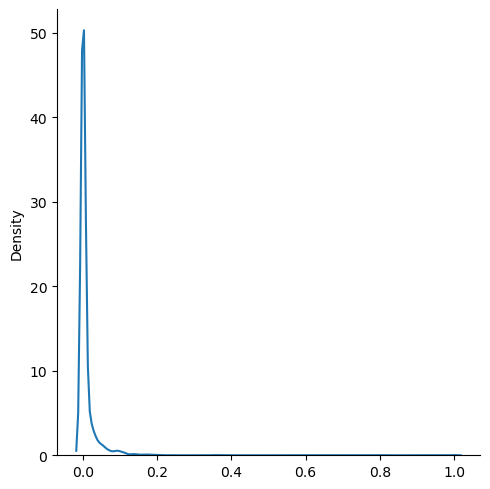

In [18]:
sns.displot(miou, kind="kde")